# Wine Quality Prediction ML Model

![Wine Glasses](wine2.jpg)

## Introduction
Welcome to the **Wine Quality Prediction ML Model Notebook**! In this project, we'll embark on an exciting journey to build a robust machine learning model that predicts the quality of wines based on a range of carefully selected features. Wine quality prediction has substantial real-world applications, aiding winemakers and enthusiasts in making informed decisions about their products and preferences.


**Dataset Source and Attributes:**

We'll be working with the renowned "Wine Quality" dataset, which provides a comprehensive set of features associated with red wines. These features encompass a variety of physical and chemical attributes that contribute to a wine's overall quality. Some of the attributes include acidity levels, residual sugar content, volatile acidity, and more. Each wine in the dataset is labeled with a quality score, allowing us to develop a predictive model that can estimate wine quality with impressive accuracy.


**Key Objectives:**

1. **Exploratory Data Analysis (EDA):** Before we dive into the modeling process, we'll extensively explore the dataset through visualizations and statistical summaries. This exploration will unveil insights into the relationships between different features and wine quality. We'll create histograms, scatter plots, and correlation matrices to better understand the underlying patterns.

2. **Feature Preprocessing and Scaling:** To ensure our model's success, we'll preprocess the dataset. This involves handling any missing values and transforming categorical attributes into a numerical format that our model can work with. We'll also scale the features to guarantee consistent and comparable values across the dataset.

3. **Model Selection and Training:** Our chosen model for this project is the Random Forest Classifier. The Random Forest algorithm excels at capturing complex relationships in data and is known for its robustness against overfitting. We'll configure the model's hyperparameters and train it on our preprocessed data.


4. **Model Evaluation and Interpretation:** Once our model is trained, we'll evaluate its performance using various metrics, such as accuracy, precision, recall, and the confusion matrix. This evaluation will provide us with insights into how well our model is generalizing to new, unseen data.

5. **Predicting Wine Quality:** With a trained model at our disposal, we'll showcase how to predict the quality of a specific wine using its features. This is where the true power of machine learning shines, as we can make accurate predictions based on the knowledge acquired during training.



**Why Random Forest?**

The Random Forest algorithm, comprised of multiple decision trees, is an ideal choice for our wine quality prediction task. Its ensemble nature allows it to overcome biases and errors that individual decision trees might make. By combining the predictions of many trees, the Random Forest achieves remarkable accuracy while maintaining the ability to handle high-dimensional datasets like ours.


Now that we have a clear overview of our project's goals and objectives, let's dive into the exciting world of data exploration, feature engineering, modeling, and prediction. But first, let's take a moment to visualize what we're aiming for:


![Wine Glasses](wine_glasses.jpeg)

## Importing Libraries and Data Loading

In [64]:
pip install --upgrade scikit-learn


In [67]:
import sklearn
print(sklearn.__version__)


1.3.0


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


## Exploratory Data Analysis (EDA)
 Display the first few rows of the dataset and check its basic information.


In [8]:
#loading  the dataset to a pandas Data frame
file_path = "winequality-red.csv" 
wine_dataset = pd.read_csv(file_path)

In [9]:
#number of rows and columns in the data set
wine_dataset.shape

(1599, 12)

In [10]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
#checking for any null or missing values in the dataset
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data analysis and Visulaization
Visualize distributions and relationships between features using histograms, scatter plots, and correlation matrices.

In [13]:
#statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


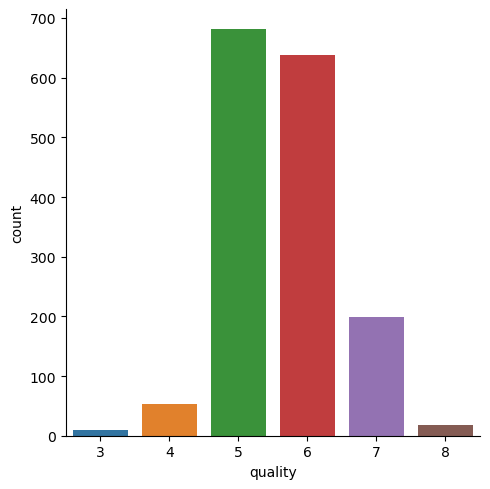

In [14]:
# number of values for each quality
sns.catplot(x='quality',data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

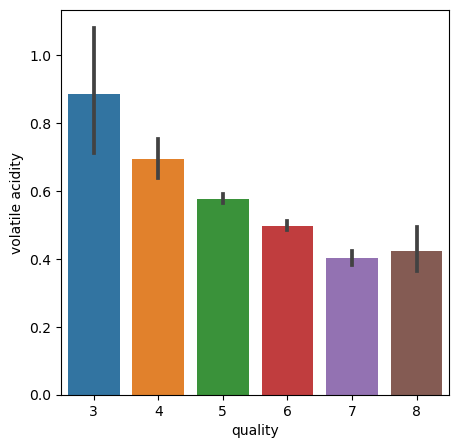

In [17]:
# volatile acidity  vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset) 

<Axes: xlabel='quality', ylabel='citric acid'>

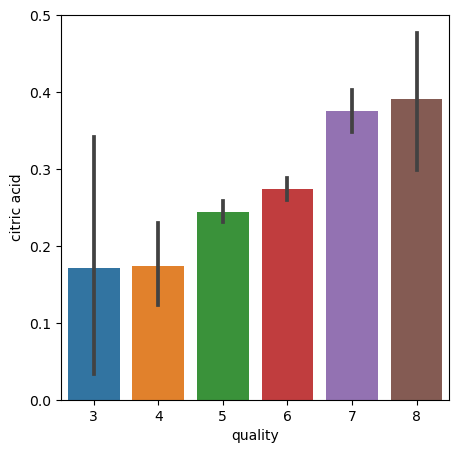

In [18]:
# citric acid  vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset) 

<Axes: xlabel='quality', ylabel='chlorides'>

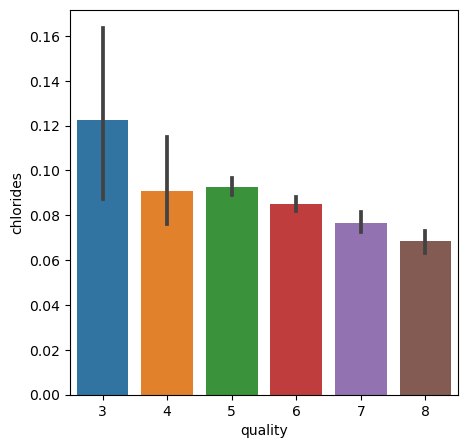

In [19]:
# chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine_dataset) 

<Axes: xlabel='quality', ylabel='alcohol'>

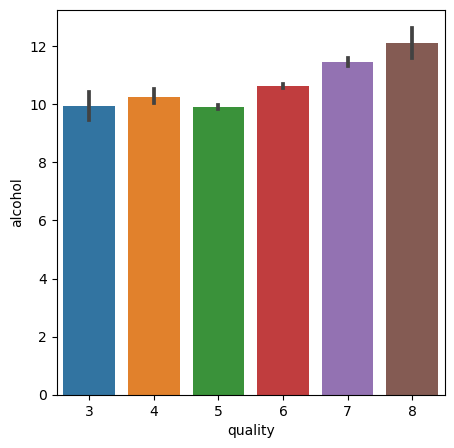

In [55]:
# alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_dataset) 

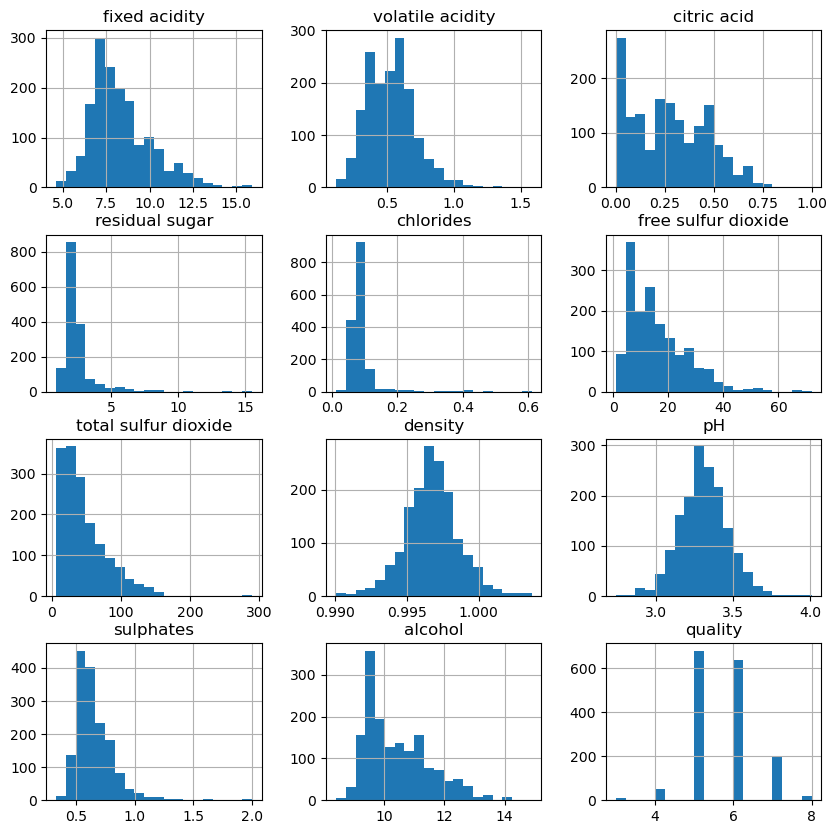

In [56]:
wine_dataset.hist(bins=20, figsize=(10, 10))
plt.show()

## Correlation

1. Positive correlation
2. Negative correlation

In [22]:
correlation = wine_dataset.corr()

<Axes: >

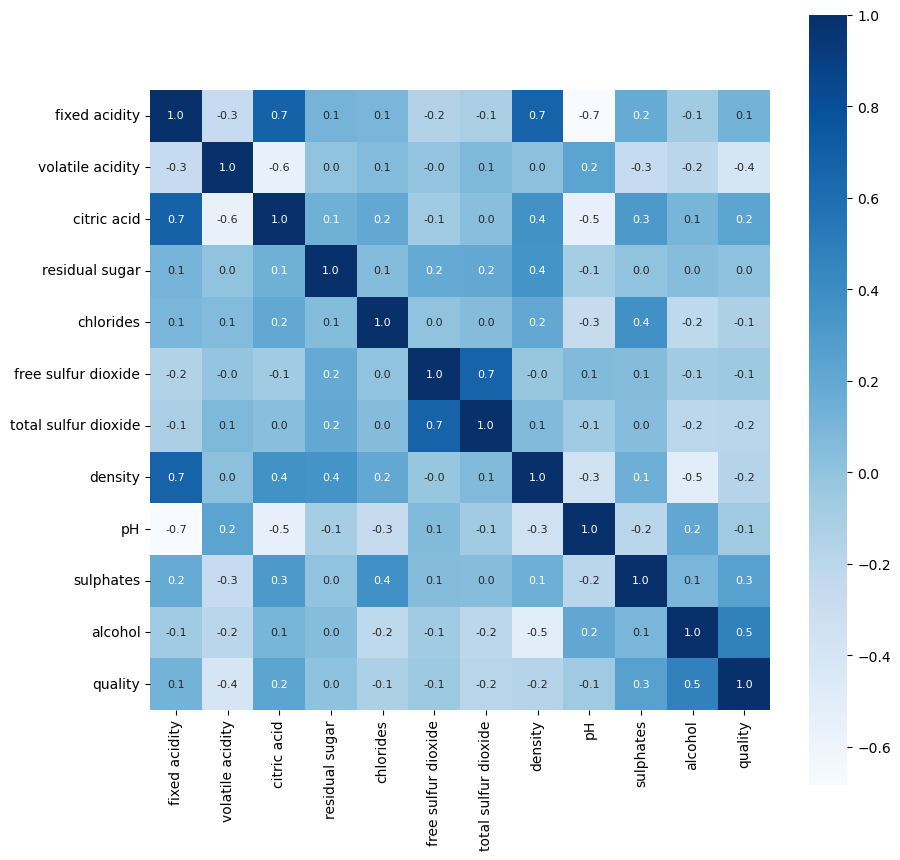

In [30]:
# constucting the heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt= '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

## Data Preprocessing
1. Handle missing values (if any).
2. Convert categorical variables (if any) into numerical format (e.g., using one-hot encoding).
3. Define features (X) and target (y).

In [31]:
#seperate the data  and the model
X = wine_dataset.drop('quality',axis=1)

In [32]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Lable binarization

In [33]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [34]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Train and Test Split Data
Split the data into training and testing sets.

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [36]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


## Model Training:
Train the model using the training data.

### Random Forest Classifier

In [37]:
model = RandomForestClassifier()

In [38]:
model.fit(X_train, Y_train)

RandomForestClassifier()

## Model Evaluation.
Make predictions on the test data and calculate accuracy.

### Accuracy Score

In [41]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
print("Test Data Accuracy:", test_data_accuracy)

Test Data Accuracy: 0.940625


In [44]:
#convert accuracy to inter percentage
integer_accuracy = int(test_data_accuracy*100)

In [45]:
print("Test Data Accuracy:", integer_accuracy, "%")

Test Data Accuracy: 94 %


## Building a Predictive System 

In [72]:


# Example input data
input_data = (7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0)

# Change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Create a DataFrame for the input data with feature names
feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
input_data_df = pd.DataFrame(input_data_as_numpy_array.reshape(1, -1), columns=feature_names)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make the prediction
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
    print('GOOD QUALITY WINE')
else:
    print('BAD QUALITY WINE')
    



[1]
GOOD QUALITY WINE


In [71]:
input_data = (7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4)

# Change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Create a DataFrame for the input data with feature names
feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
input_data_df = pd.DataFrame(input_data_as_numpy_array.reshape(1, -1), columns=feature_names)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make the prediction
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
    print('GOOD QUALITY WINE')
else:
    print('BAD QUALITY WINE')
    

[0]
BAD QUALITY WINE


## Conclusion
1. Summarize the key points and results of the project.
2. Mention areas for potential improvement and further analysis.


## References
If you used external resources, datasets, or libraries, list them here.

**By following this structure, you create a notebook that's well-organized, easy to follow, and presents your work in a clear and understandable manner. You can further enhance it by including markdown cells with explanations, visualizations, and comments throughout the notebook.**




